Iga Antonik, 8.03.2024
# Laboratorium 01
## Analiza Błędów

# Zadanie 1.
Oblicz przybliżoną wartość pochodnej funkcji, używając wzoru
$$
f′(x)≈ \frac{f(x+h)−f(x)}{h}
$$
Sprawdź działanie programu dla funkcji $tan(x)$ oraz $x = 1$. Wyznacz błąd, porównując otrzymaną wartość numerycznej pochodnej z prawdziwą wartością. Pomocna będzie tożsamość $tan′(x) = 1 + tan^2(x)$.
Na wspólnym rysunku przedstaw wykresy wartości bezwględnej błędu metody, błędu numerycznego oraz błędu obliczeniowego w zależności od h dla $ h = 10^{−k} , k = 0, . . . , 16 $. Użyj skali logarytmicznej na obu osiach. Czy wykres wartości bezwględnej błędu obliczeniowego posiada minimum?
Porównaj wyznaczoną wartość hmin z wartością otrzymaną ze wzoru 
$$h_{min} ≈ 2\sqrt{ε/M} $$ 
gdzie $M ≈ |f^{′′}(x)| $
Powtórz ćwiczenie używając wzoru różnic centralnych
$$
\begin{aligned}
f′(x)≈ \frac{f(x+h)−f(x−h)}{2h}
\end{aligned}
$$
Porównaj wyznaczoną wartość hmin z wartością otrzymaną ze wzoru
$$ h_{min} ≈\sqrt[3]{3ε/M} $$
 gdzie $M ≈ |f^{′′′}(x)|$


## Rozwiązanie
### Biblioteki
Korzystam z biblioteki NumPy ze względu na jej zalety w pracy z wielowymiarowymi tablicami danych oraz operacjami numerycznymi. 
Do rysowania wykresów wykorzystuję bibliotekę matplotlib.

In [72]:
import numpy as np
import matplotlib.pyplot as plt

Deklaruję funkcje pomocnicze, które obliczają pochodną funkcji z metody różnic skończonych oraz z metody różnic centralnych, a także funkcje, które obliczają pierwszą, drugą i trzecią pochodną funkcji tangens z dokładnych wzorów.

In [73]:
def f(x):
    return np.tan(x)


def forward_difference(x, h):
    return (f(x + h) - f(x)) / h


def central_difference(x, h):
    return (f(x + h) - f(x - h)) / (2*h)


def first_derivative(x):
    return 1 + np.tan(x)**2


def second_derivative(x):
    return 2*np.tan(x) + 2*(np.tan(x)**3)


def third_derivative(x):
    return 2 + 8*(np.tan(x)**2) + 6*(np.tan(x)**4)

Oprócz tego w poniższym kodzie używane są oznaczenia:
x0 - punkt, w którym będziemy obliczać wartość funkcji
h_values - tablica wartości h
mini, mini2 - zmienne pomocnicze od obliczania minimum przy obu metodach
h_min_plot, h_min_plot2 - minima na wykresie wartości bezwględnej błędu obliczeniowego dla obu metod
truncation_errors(2)  - tablica wartości błędu metody dla danego h dla obu metod
rounding_errors(2) - tablica wartości błędu numerycznego dla danego h dla obu metod
approx_errors(2) - tablica wartości błędu obliczeniowego dla danego h dla obu metod


In [74]:
x0 = 1
h_values = np.power(10.0, -np.arange(0, 17))
mini = float('inf')
mini2 = float('inf')
h_min_plot = 0
h_min_plot2 = 0

truncation_errors = []
rounding_errors = []
approx_errors = []

truncation_errors2 = []
rounding_errors2 = []
approx_errors2 = []

W poniższym kodzie dla każdego h obliczane są odpowiednie błędy.

Dla metody różnic skończonych:
- wartość błędu metody (t_value) obliczana jest ze wzoru: $ \frac{Mh}{2} $;
- wartość błędu numerycznego (r_value) obliczana jest ze wzoru: $ \frac{2\epsilon}{h} $;
gdzie $ M ≈  |f^{''}(x)| $

Dla metody różnic centralnych:
- wartość błędu metody (t_value2) obliczana jest ze wzoru: $ \frac{Mh^2}{6} $;
- wartość błędu numerycznego (r_value2) obliczana jest ze wzoru: $ \frac{\epsilon}{h} $;
gdzie $ M ≈  |f^{'''}(x)| $

Wartość błędu obliczeniowego (a_value(2)) przy obu metodach jest obliczana jako wartość bezwzględna z różnicy między wynikiem z podanego na pochodną wzoru, a wynikiem uzyskanym dzięki odpowiedniej metodzie.

Pętlę wykorzystuję także do znalezienia $h_{min}$ na wykresie

In [75]:
for h in h_values:
    M = np.abs(second_derivative(x0))
    approx_value = forward_difference(x0, h)
    t_value = M*h/2
    r_value = 2*np.finfo(float).eps/h
    a_value = np.abs(first_derivative(x0) - approx_value)
    truncation_errors.append(t_value)
    rounding_errors.append(r_value)
    approx_errors.append(a_value)
    if a_value < mini:
        mini = a_value
        h_min_plot = h

    M2 = np.abs(third_derivative(x0))
    approx_value2 = central_difference(x0, h)
    t_value2 = M2*(h**2)/6
    r_value2 = np.finfo(float).eps/h
    a_value2 = np.abs(first_derivative(x0) - approx_value2)
    truncation_errors2.append(t_value2)
    rounding_errors2.append(r_value2)
    approx_errors2.append(a_value2)
    if a_value2 < mini2:
        mini2 = a_value2
        h_min_plot2 = h


## Opracowanie wyników
### Porównanie wartości $ h_{min} $
Do przybliżenia wartości $ h_{min} $ używam wzoru:
  - $h_{min} ≈ 2\sqrt{ε/M} $ przy metodzie różnic skończonych
  - $h_{min} ≈\sqrt[3]{3ε/M} $ przy metodzie różnic centralnych

In [76]:
h_min = 2 * np.sqrt(np.finfo(float).eps / np.abs(second_derivative(x0)))
print("h_min using formula: ", h_min, ", h_min on plot: ", h_min_plot)
print("Difference of h_min in forward difference method: ", np.abs(h_min - h_min_plot))

h_min2 = np.cbrt(3*np.finfo(float).eps / np.abs(third_derivative(x0)))
print("h_min using formula: ", h_min2, ", h_min on plot: ", h_min_plot2)
print("Difference of h_min in central difference method: ", np.abs(h_min2 - h_min_plot2))

h_min using formula:  9.123695225180453e-09 , h_min on plot:  1e-08
Difference of h_min in forward difference method:  8.763047748195471e-10
h_min using formula:  2.273274156839062e-06 , h_min on plot:  1e-06
Difference of h_min in central difference method:  1.2732741568390622e-06


### Wykresy
#### Wykres błędów dla metody różnic skończonych

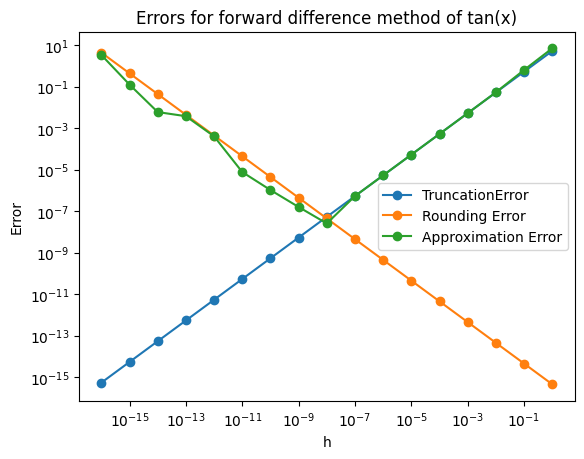

In [77]:
plt.figure()
plt.loglog(h_values, truncation_errors, label='TruncationError', marker='o')
plt.loglog(h_values, rounding_errors, label='Rounding Error', marker='o')
plt.loglog(h_values, approx_errors, label='Approximation Error', marker='o')
plt.xlabel('h')
plt.ylabel('Error')
plt.title('Errors for forward difference method of tan(x)')
plt.legend()
plt.show()



Analizując powyższy wykres można zauważyć, że: 
- błąd metody zwiększa się wraz ze wzrostem wartości h, ponieważ przybliżenie pochodnej staje się dokładniejsze;
- błąd numeryczny maleje wraz ze wzrostem h, ponieważ różnica między wartościami funkcji staje się coraz mniejsza, a wpływ błędu reprezentacji liczb stałoprzecinkowych staje się bardziej znaczący.
- wykres błędu obliczeniowego posiada minimum


#### Wykres błędów dla metody różnic centralnych

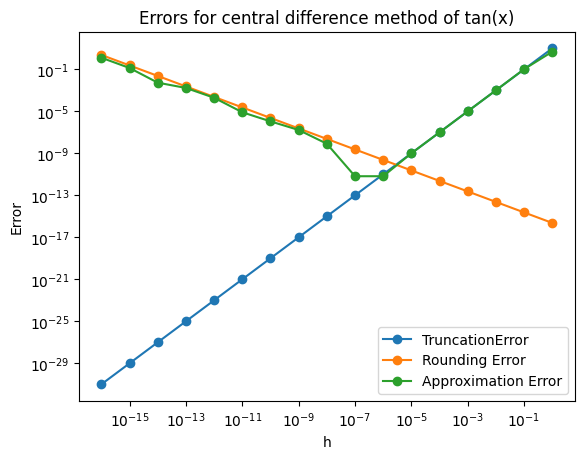

In [78]:
plt.figure()
plt.loglog(h_values, truncation_errors2, label='TruncationError', marker='o')
plt.loglog(h_values, rounding_errors2, label='Rounding Error', marker='o')
plt.loglog(h_values, approx_errors2, label='Approximation Error', marker='o')
plt.xlabel('h')
plt.ylabel('Error')
plt.title('Errors for central difference method of tan(x)')
plt.legend()
plt.show()

Analizując powyższy wykres można zauważyć, że: 
- błąd metody zwiększa się wraz ze wzrostem wartości h, ponieważ przybliżenie pochodnej staje się dokładniejsze;
- błąd numeryczny maleje wraz ze wzrostem h, ponieważ różnica między wartościami funkcji staje się coraz mniejsza, a wpływ błędu reprezentacji liczb stałoprzecinkowych staje się bardziej znaczący.
- wykres błędu obliczeniowego posiada minimum

## Wnioski

Przeprowadzona analiza pokazuje, że dobór metody obliczeniowej, a także wartości h mają wpływ na dokładność obliczeń.

Metoda różnic centralnych okazała się być bardziej efektywna. Pozwala ona osiągnąć mniejsze wartości błędów dla tych samych wartości h w porównaniu do metody różnic skończonych.

Optymalny wybór h zależy od błędu metody oraz błędu numerycznego.
Dla obu metod istnieje wartość minimalna h (minimum wykresu wartości bezwzględnej błędu obliczeniowego), która jest związana z błędem metody i błędem numerycznym. 
Wartości minimalne h odczytane z wykresu są mocno zbliżone do tych otrzymanych ze wzorów.

Podsumowując, analiza błędów dla obu metod obliczeń pochodnej pokazuje przewagę metody różnic centralnych nad metodą różnic skończonych z powodu jej lepszej ogólnej dokładności i mniejszego błędu metody. Istotny jest także wybór odpowiedniej wartości h. Wyniki programu podkreślają jak ważne jest zrozumienie i zarządzanie błędami numerycznymi w obliczeniach matematycznych.


# Zadanie 2.
Napisz program generujący pierwsze n wyrazów ciągu zdefiniowanego równaniem różnicowym:
$$ x_{k+1} = 2.25x_k − 0.5x_{k−1} $$
 z wyrazami początkowymi: $ x_0 = \frac{1}{3}; x_1 = \frac{1}{12}$
Wykonaj obliczenia:
• używając pojedynczej precyzji oraz przyjmując n = 225
• używając podwójnej precyzji oraz przyjmując n = 60
• używając reprezentacji z biblioteki fractions oraz przyjmując n = 225.
Narysuj wykres wartości ciągu w zależności od k. Użyj skali logarytmicznej na osi y (pomocna będzie funkcja semilogy). Następnie narysuj wykres przedstawiający wartość bezwględną błędu względnego w zależności od k.
Dokładne rozwiązanie równania różnicowego:
$ x_k = \frac{4^{−k}}{3} $
maleje wraz ze wzrostem k. Czy otrzymany wykres zachowuje się w ten sposób? Wyjaśnij otrzymane wyniki.
Unikaj pętli for na rzecz kodu wektorowego oraz funkcji uniwersalnych (np. np.tan zamiast math.tan).



## Rozwiązanie
### Biblioteki
Korzystam z biblioteki NumPy ze względu na jej zalety w pracy z wielowymiarowymi tablicami danych oraz operacjami numerycznymi. 
Do rysowania wykresów wykorzystuję bibliotekę matplotlib.
Importuję także wymaganą w treści zadania bibliotekę fraction.

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

Poniżej zadeklarowane są funkcje, które obliczają n pierwszych wyrazów ciągu. Pierwsza bierze pod uwagę precyzję reprezentowania liczb, a druga korzysta z biblioteki fractions, reprezentacji ułamkowej. Zaimplementowana jest także funkcja obliczająca dokładną wartość wyrazów ciągu opartą na wzorze.

In [80]:
def generate_sequence(x0, x1, n, precision=np.single):
    sequence = np.zeros(n, dtype=precision)
    sequence[0] = x0
    sequence[1] = x1
    for k in range(2, n):
        sequence[k] = precision(2.25) * sequence[k-1] - precision(0.5) * sequence[k-2]
    return sequence


def generate_sequence_fraction(x0, x1, n):
    sequence = [Fraction(0) for _ in range(n)]
    sequence[0] = Fraction(x0)
    sequence[1] = Fraction(x1)
    for k in range(2, n):
        sequence[k] = Fraction(2.25) * sequence[k-1] - Fraction(0.5) * sequence[k-2]
    return sequence


def exact_solution(n):
    return  np.array([(4**(-k))/3 for k in range(n)])


### Parametry początkowe
Deklaruję odpowiednie wyrazy początkowe, pamiętając aby uwzględnić ich precyzję, sposób reprezentowania.

In [81]:
x0_single = np.single(1/3)
x1_single = np.single(1/12)
x0_double = np.double(1/3)
x1_double = np.double(1/12)
x0_fraction = Fraction(1, 3)
x1_fraction = Fraction(1, 12)

### Generowanie ciągów

In [82]:
sequence_single = generate_sequence(x0_single, x1_single, 225)
sequence_double = generate_sequence(x0_double, x1_double, 60, np.double)
sequence_fraction = generate_sequence_fraction(x0_fraction, x1_fraction, 225)
sequence_exact = exact_solution(225)
sequence_exact60 = exact_solution(60)

/var/folders/j0/4w2hc5p557nd02zgl7r_cfnr0000gn/T/ipykernel_14058/1874583438.py:6: RuntimeWarning: overflow encountered in scalar multiply
  sequence[k] = precision(2.25) * sequence[k-1] - precision(0.5) * sequence[k-2]
/var/folders/j0/4w2hc5p557nd02zgl7r_cfnr0000gn/T/ipykernel_14058/1874583438.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  sequence[k] = precision(2.25) * sequence[k-1] - precision(0.5) * sequence[k-2]


## Opracowanie wyników
### Wykresy
#### Wykres wartości ciągu w zależności od k

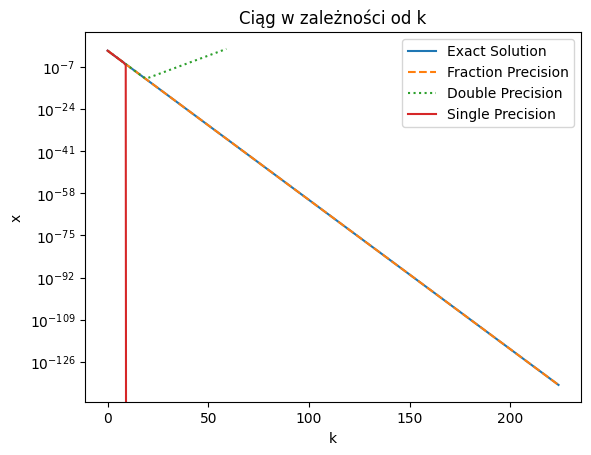

In [83]:
plt.figure()
plt.semilogy(sequence_exact, label='Exact Solution')
plt.semilogy(sequence_fraction, label='Fraction Precision', linestyle='--')
plt.semilogy(sequence_double, label='Double Precision', linestyle='dotted')
plt.semilogy(sequence_single, label='Single Precision')
plt.xlabel('k')
plt.ylabel('x')
plt.title('Ciąg w zależności od k')
plt.legend()
plt.show()

Analizując powyższy wykres można zauważyć, że: 
- wartości ciągu obliczone przy pomocy reprezentacji liczb za pomocą biblioteki fraction pokrywają sie z dokładnycmi oczekiwamymi wartościami;
- wartości ciągu obliczne przy użyciu pojedynczej precyzji wyliczane są tylko dla kilku początkowych wartości k;
- wartości ciągu obliczne przy użyciu podwójnej precyzji od pewnego momentu nie pokrywają się z oczekiwanymi wartościami, a nawet coraz bardziej się od nich oddalają, funkcja przestaje maleć.

#### Wykres wartości bezwględnej błędu względnego w zależności od k

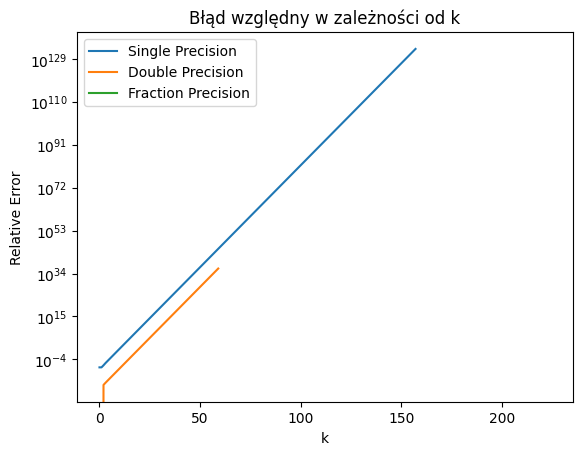

In [84]:
plt.figure()
relative_errors_single = np.abs((sequence_single - sequence_exact)/sequence_exact)
relative_errors_double = np.abs((sequence_double - sequence_exact60)/sequence_exact60)
relative_errors_fraction = np.abs((sequence_fraction-sequence_exact)/sequence_exact)
plt.semilogy(relative_errors_single, label='Single Precision')
plt.semilogy(relative_errors_double, label='Double Precision')
plt.semilogy(relative_errors_fraction, label='Fraction Precision')
plt.xlabel('k')
plt.ylabel('Relative Error')
plt.title('Błąd względny w zależności od k')
plt.legend()
plt.show()

Analizując powyższy wykres można zauważyć, że:
-błąd względny jest mniejszy dla wartości obliczonych przy pomocy precyzji podwójnej.

## Wnioski

Przeprowadzona analiza pokazuje, że sposób oraz precyzja z jaką reprezentowane są liczby ma znaczący wpływ na dokładność wyników obliczeń.

Użycie arytmetyki ułamkowej eliminuje błąd numeryczny, co pozwala na uzyskanie wartości zgodnych z rozwiązaniem analitycznym. Z kolei reprezentacja zmiennoprzecinkowa (pojedyncza i podwójna precyzja) wprowadza błędy zaokrągleń, które mogą akumulować się przy obliczaniu kolejnych wyrazów ciągu.

Przy pojedynczej występuje problem z przekroczeniem zakresu wartości reprezentowanych przez pojedynczą precyzję.

Podsumowując, wybór odpowiedniej precyzji i typu danych jest kluczowy. Dla zadań wymagających długotrwałych obliczeń rekursywnych, użycie wyższej precyzji lub arytmetyki ułamkowej zdecydowanie poprawi dokładność obliczeń.




# Bibliografia
http://heath.cs.illinois.edu/scicomp/notes/cs450_chapt01.pdf

https://pypi.org/project/Fraction/

prezentacja Error Analisis, Marcin Kuta
